In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Performing grid search
from scipy.stats import skew
from collections import OrderedDict
from sklearn.inspection import permutation_importance
import shap
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, KFold
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import joblib
import numbers
import torch
from torch_geometric.loader import DataLoader  

An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.27' not found (required by /home/public/anaconda3/lib/python3.11/site-packages/libpyg.so)
An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.27' not found (required by /home/public/anaconda3/lib/python3.11/site-packages/libpyg.so)


In [2]:
# 直接加载当前目录下的 style.mplstyle
plt.style.use('~/style.mplstyle')

In [3]:
# 固定随机种子
def set_seed(seed):
    import random
    random.seed(seed)  # 固定 Python 的随机种子
    np.random.seed(seed)  # 固定 NumPy 的随机种子
    torch.manual_seed(seed)  # 固定 PyTorch 的随机种子
    torch.cuda.manual_seed(seed)  # 固定 GPU 上的随机种子
    torch.backends.cudnn.deterministic = True  # 确保 CuDNN 的确定性
    torch.backends.cudnn.benchmark = False  # 禁用非确定性算法优化

# 在函数开头调用
set_seed(42)  # 42 是种子值，可替换为其他数值

In [4]:
import matplotlib.pyplot as plt

# 打印当前使用的字体
print("当前字体:", plt.rcParams["font.family"])

当前字体: ['Arial']


In [5]:
# 使用 joblib 保存模型
def save_model_with_joblib(model, filename):
    """
    使用 joblib 保存XGBoost模型。

    参数:
    model -- 训练好的机器学习模型
    filename -- 模型保存的文件名，应以 .joblib 结尾

    返回:
    None
    """
    joblib.dump(model, filename)

In [6]:
import torch
# 加载数据集
def load_data_list(file_path):
    """
    从指定文件路径加载数据列表。

    参数：
    file_path (str): 数据列表文件的路径。

    返回：
    list: 加载的数据列表。
    """
    return torch.load(file_path)

############## Tm ##############
Tm_load_file_path = '../dataset/Tm_data_list.pt' # 总数据集
Tm_load_train_dataset_path = '../dataset/train_Tm_data_list.pt' # 训练集
Tm_load_val_dataset_path = '../dataset/val_Tm_data_list.pt' # 验证集
Tm_load_test_dataset_path = '../dataset/test_Tm_data_list.pt' # 验证集

# 加载数据集
Tm_loaded_data_list = load_data_list(Tm_load_file_path)
Tm_loaded_train_data_list = load_data_list(Tm_load_train_dataset_path)
Tm_loaded_val_data_list = load_data_list(Tm_load_val_dataset_path)
Tm_loaded_test_data_list = load_data_list(Tm_load_test_dataset_path)

# 打印加载后数据集的信息
print(f"加载的数据列表大小: {len(Tm_loaded_data_list)}")
print(f"加载的训练数据列表大小: {len(Tm_loaded_train_data_list)}")
print(f"加载的验证数据列表大小: {len(Tm_loaded_val_data_list)}")
print(f"加载的测试数据列表大小: {len(Tm_loaded_test_data_list)}")

# 加载训练集、测试集与验证集
Tm_train_loader = DataLoader(Tm_loaded_train_data_list, batch_size=32, shuffle=True)  
Tm_val_loader = DataLoader(Tm_loaded_val_data_list, batch_size=32, shuffle=False)  
Tm_test_loader = DataLoader(Tm_loaded_test_data_list, batch_size=32, shuffle=False) 


############## conductivity ##############
conductivity_load_file_path = '../dataset/conductivity_data_list.pt' # 总数据集
conductivity_load_train_dataset_path = '../dataset/train_conductivity_data_list.pt' # 训练集
conductivity_load_val_dataset_path = '../dataset/val_conductivity_data_list.pt' # 验证集
conductivity_load_test_dataset_path = '../dataset/test_conductivity_data_list.pt' # 验证集

# 加载数据集
conductivity_loaded_data_list = load_data_list(conductivity_load_file_path)
conductivity_loaded_train_data_list = load_data_list(conductivity_load_train_dataset_path)
conductivity_loaded_val_data_list = load_data_list(conductivity_load_val_dataset_path)
conductivity_loaded_test_data_list = load_data_list(conductivity_load_test_dataset_path)

# 打印加载后数据集的信息
print(f"加载的数据列表大小: {len(conductivity_loaded_data_list)}")
print(f"加载的训练数据列表大小: {len(conductivity_loaded_train_data_list)}")
print(f"加载的验证数据列表大小: {len(conductivity_loaded_val_data_list)}")
print(f"加载的测试数据列表大小: {len(conductivity_loaded_test_data_list)}")

# 加载训练集、测试集与验证集
conductivity_train_loader = DataLoader(conductivity_loaded_train_data_list, batch_size=32, shuffle=True)  
conductivity_val_loader = DataLoader(conductivity_loaded_val_data_list, batch_size=32, shuffle=False)  
conductivity_test_loader = DataLoader(conductivity_loaded_test_data_list, batch_size=32, shuffle=False)  

######################阴离子氧化势######################
anion_ox_save_total_dataset_path = '../dataset/anion_ox_data_list.pt' # 总数据集
anion_ox_save_train_dataset_path = '../dataset/train_anion_ox_data_list.pt' # 训练集
anion_ox_save_val_dataset_path = '../dataset/val_anion_ox_data_list.pt' # 验证集
anion_ox_save_test_dataset_path = '../dataset/test_anion_ox_data_list.pt' # 测试集

# 加载数据集
anion_ox_loaded_data_list = load_data_list(anion_ox_save_total_dataset_path)
anion_ox_loaded_train_data_list = load_data_list(anion_ox_save_train_dataset_path)
anion_ox_loaded_val_data_list = load_data_list(anion_ox_save_val_dataset_path)
anion_ox_loaded_test_data_list = load_data_list(anion_ox_save_test_dataset_path)

# 打印加载后数据集的信息
print(f"加载的数据列表大小: {len(anion_ox_loaded_data_list)}")
print(f"加载的训练数据列表大小: {len(anion_ox_loaded_train_data_list)}")
print(f"加载的验证数据列表大小: {len(anion_ox_loaded_val_data_list)}")
print(f"加载的测试数据列表大小: {len(anion_ox_loaded_test_data_list)}")

# 加载训练集、测试集与验证集
anion_ox_train_loader = DataLoader(anion_ox_loaded_train_data_list, batch_size=32, shuffle=True)  
anion_ox_val_loader = DataLoader(anion_ox_loaded_val_data_list, batch_size=32, shuffle=False)  
anion_ox_test_loader = DataLoader(anion_ox_loaded_test_data_list, batch_size=32, shuffle=False)  

######################阳离子还原势######################
cation_red_save_total_dataset_path = '../dataset/cation_red_data_list.pt' # 总数据集
cation_red_save_train_dataset_path = '../dataset/train_cation_red_data_list.pt' # 训练集
cation_red_save_val_dataset_path = '../dataset/val_cation_red_data_list.pt' # 验证集
cation_red_save_test_dataset_path = '../dataset/test_cation_red_data_list.pt' # 测试集

# 加载数据集
cation_red_loaded_data_list = load_data_list(cation_red_save_total_dataset_path)
cation_red_loaded_train_data_list = load_data_list(cation_red_save_train_dataset_path)
cation_red_loaded_val_data_list = load_data_list(cation_red_save_val_dataset_path)
cation_red_loaded_test_data_list = load_data_list(cation_red_save_test_dataset_path)

# 打印加载后数据集的信息
print(f"加载的数据列表大小: {len(cation_red_loaded_data_list)}")
print(f"加载的训练数据列表大小: {len(cation_red_loaded_train_data_list)}")
print(f"加载的验证数据列表大小: {len(cation_red_loaded_val_data_list)}")
print(f"加载的测试数据列表大小: {len(cation_red_loaded_test_data_list)}")

# 加载训练集、测试集与验证集
cation_red_train_loader = DataLoader(cation_red_loaded_train_data_list, batch_size=32, shuffle=True)  
cation_red_val_loader = DataLoader(cation_red_loaded_val_data_list, batch_size=32, shuffle=False)  
cation_red_test_loader = DataLoader(cation_red_loaded_test_data_list, batch_size=32, shuffle=False)  

######################离子液体ECW######################
IL_ECW_save_total_dataset_path = '../dataset/IL_ECW_data_list.pt' # 总数据集
IL_ECW_save_train_dataset_path = '../dataset/train_IL_ECW_data_list.pt' # 训练集
IL_ECW_save_val_dataset_path = '../dataset/val_IL_ECW_data_list.pt' # 验证集
IL_ECW_save_test_dataset_path = '../dataset/test_IL_ECW_data_list.pt' # 测试集

# 加载数据集
IL_ECW_loaded_data_list = load_data_list(IL_ECW_save_total_dataset_path)
IL_ECW_loaded_train_data_list = load_data_list(IL_ECW_save_train_dataset_path)
IL_ECW_loaded_val_data_list = load_data_list(IL_ECW_save_val_dataset_path)
IL_ECW_loaded_test_data_list = load_data_list(IL_ECW_save_test_dataset_path)

# 打印加载后数据集的信息
print(f"加载的数据列表大小: {len(IL_ECW_loaded_data_list)}")
print(f"加载的训练数据列表大小: {len(IL_ECW_loaded_train_data_list)}")
print(f"加载的验证数据列表大小: {len(IL_ECW_loaded_val_data_list)}")
print(f"加载的测试数据列表大小: {len(IL_ECW_loaded_test_data_list)}")

# 加载训练集、测试集与验证集
IL_ECW_train_loader = DataLoader(IL_ECW_loaded_train_data_list, batch_size=32, shuffle=True)  
IL_ECW_val_loader = DataLoader(IL_ECW_loaded_val_data_list, batch_size=32, shuffle=False)  
IL_ECW_test_loader = DataLoader(IL_ECW_loaded_test_data_list, batch_size=32, shuffle=False)  

加载的数据列表大小: 1668
加载的训练数据列表大小: 1334
加载的验证数据列表大小: 167
加载的测试数据列表大小: 167
加载的数据列表大小: 549
加载的训练数据列表大小: 439
加载的验证数据列表大小: 55
加载的测试数据列表大小: 55
加载的数据列表大小: 159
加载的训练数据列表大小: 127
加载的验证数据列表大小: 16
加载的测试数据列表大小: 16
加载的数据列表大小: 696
加载的训练数据列表大小: 556
加载的验证数据列表大小: 70
加载的测试数据列表大小: 70
加载的数据列表大小: 1466
加载的训练数据列表大小: 1172
加载的验证数据列表大小: 147
加载的测试数据列表大小: 147


In [19]:
'''
我通过下列代码加载了阳离子的数据集和阴离子的训练集和测试集（以列表形式存储）：
cation_loaded_train_data_list = load_data_list(cation_load_train_dataset_path)
cation_loaded_val_data_list = load_data_list(cation_load_val_dataset_path)
anion_loaded_train_data_list = load_data_list(anion_load_train_dataset_path)
anion_loaded_val_data_list = load_data_list(anion_load_val_dataset_path)
其中每个数据集列表的形式如下所示：
Data(x=[50, 5], edge_index=[2, 98], y=[1, 17], idx=[1], name='c-c19+c-b10+c-b18+c-b79', 
smiles='[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H])[P+](C([H])([H])C(=O)C([H])([H])C([H])([H])[H])(C([H])([H])C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H]',
morgan_fp=[1, 2048], moldescriptor=[1, 183])
请以moldescriptor（tensor形式存储）作为特征值X，y中第index个值（同样以tensor形式存储）作为预测值Y，请修改下列函数以满足我给出的要求：
'''

import xgboost as xgb
import optuna
import time
import torch
import numpy as np
from sklearn.metrics import mean_squared_error

def extract_features_targets(data_list, scale=1, feature = "fp"):
    """
    从数据列表中提取moldescriptor作为特征X和y中指定索引的值作为目标Y。
    
    Args:
        data_list (list): 包含Data对象的列表。
        feature (str): 可选"2Ddescriptors"或“fp”，代表训练模型时使用的特征
        
    Returns:
        X (np.ndarray): 特征矩阵。
        Y (np.ndarray): 目标向量。
    """
    X = []
    Y = []
    for data in data_list:
        # 提取moldescriptor，假设其形状为 [1, 183]
        if feature == "2Ddescriptors":
            moldescriptor = data.moldescriptor.numpy().flatten() # 采用分子描述符作为特征
            X.append(moldescriptor)
            
        elif feature == "fp":
            fp = data.morgan_fp.numpy().flatten() # 采用分子描述符作为特征
            X.append(fp)
            
        # 提取目标y值
        target = data.y.numpy().flatten()
        Y.append(scale*target)
        
    # print(X)
    
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

def XGBoost_model_optuna(train_list, val_list, scale=1, feature = "2Ddescriptors"):
    """
    使用Optuna优化XGBoost模型参数，并训练和评估模型。
    
    Args:
        train_list (list): 训练集列表（包含所有阳离子和阴离子数据）。
        val_list (list): 验证集列表（包含所有阳离子和阴离子数据）。
        target_index (int): y中要预测的索引位置。
        feature (str): 可选"2Ddescriptors"或“fp”，代表训练模型时使用的特征。

    Returns:
        best_model (xgb.XGBRegressor): 训练好的XGBoost模型。
    """
    start_time = time.time()
    
    # 提取训练集特征和目标
    X_train, y_train = extract_features_targets(train_list, scale, feature)
    
    # 提取验证集特征和目标
    X_val, y_val = extract_features_targets(val_list, scale, feature)
    
    def objective(trial):
        # 定义搜索空间
        param = {
            "max_depth": trial.suggest_int("max_depth", 3, 10),  # 决策树最大深度
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),  # 学习率
            "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),  # 树的数量
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),  # 最小叶子节点样本权重和
            "gamma": trial.suggest_float("gamma", 0, 5),  # 分裂所需的最小损失减少值
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),  # 数据采样比例
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),  # 特征采样比例
            "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10, log=True),  # L1正则化
            "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10, log=True),  # L2正则化
        }
        
        # 初始化模型
        model = xgb.XGBRegressor(
            objective="reg:squarederror",
            **param,
            random_state=42,
            n_jobs=-1
        )
        
        # 训练模型
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=30,
            verbose=False
        )
        
        # 验证集预测
        y_pred = model.predict(X_val)
        
        # 返回均方误差
        return mean_squared_error(y_val, y_pred)
    
    # 使用Optuna进行参数优化
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=100, timeout=600)  # X次试验，最多优化600秒
    
    # 获取最佳参数
    best_params = study.best_params
    #print("最佳参数: ", best_params)
    
    # 使用最佳参数训练最终模型
    best_model = xgb.XGBRegressor(
        objective="reg:squarederror",
        **best_params,
        random_state=42,
        n_jobs=-1
    )
    best_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=30,
        verbose=False
    )
    
    # 输出训练时间
    end_time = time.time()
    #print("训练时间: {:.2f} 秒".format(end_time - start_time))
    
    # 评估最终模型
    y_final_pred = best_model.predict(X_val)
    final_mse = mean_squared_error(y_val, y_final_pred)
    print("最终验证集均方误差 (MSE): {:.4f}".format(final_mse))
    
    return best_model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, val_list, scale=1, figname="model_evaluation",
                   figsize=(2.3, 2.3), output=False, feature = "2Ddescriptors"):
    """
    对模型在验证集上进行评估，并打印出不同的性能指标。
    
    参数:
        model -- 已训练的机器学习模型
        val_list -- 验证集列表（包含所有数据）
        target_index (int) -- y中要预测的索引位置，默认为0
        figname (str) -- 保存图像的文件名，不包括扩展名，默认为 "model_evaluation"
        figsize (tuple) -- 图像的大小，默认为 (6, 6)
        output (bool) -- 是否保存图像，默认为 False
    
    返回:
        None
    """
    
    # 提取验证集特征和目标
    X_test, y_test = extract_features_targets(val_list, scale, feature)
    
    # 设置字体为 Arial
    plt.rcParams["font.family"] = "Arial"
    
    # 使用模型对测试集进行预测
    y_pred = model.predict(X_test)
    
    # 计算MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    
    # 计算MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    
    # 计算RMSE
    rmse = np.sqrt(mse)  # RMSE是MSE的平方根
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    
    # 计算R^2 Score
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 Score: {r2:.2f}")
   
    # 可视化预测值与真实值
    f, ax = plt.subplots(figsize=figsize)  # 创建图和轴对象
    ax.scatter(y_pred, y_test, s=0.5)  # 绘制散点图，调整点大小和透明度
    
    # 绘制参考线，斜率为1
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")  # 添加参考线
    
    plt.xlabel("Predicted Value")  # 设置X轴标签
    plt.ylabel("Ground Truth")     # 设置Y轴标签
    # plt.title("Predicted vs Ground Truth")  # 设置图表标题
    
    # 在左上角显示 MAE、MSE 和 R²
    text_str = f"MAE = {mae:.2f}\nMSE = {mse:.2f}\nR² = {r2:.2f}"
    plt.text(
        0.05, 0.95, text_str,
        transform=ax.transAxes,  # 使用轴坐标进行定位
        fontsize=7, color="black",
        verticalalignment="top", horizontalalignment="left",
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
    )
    
    # 设置边框宽度
    for spine in ax.spines.values():
        spine.set_linewidth(1)
    
    # 保存图片（如果 output 为 True）
    if output:
        plt.savefig(f"{figname}.png", dpi=300, bbox_inches="tight")
    
    plt.show()
    return mae, mse, r2

In [12]:
def train_multiple_xgboost_models(seed, N, train_list, val_list, test_list, target_index, feature):
    """
    根据不同的随机种子训练多个XGBoost模型，并在测试集上评估性能。
    
    参数：
    -----------
    seed : int
        初始随机种子值。
    N : int
        训练模型的数量，即迭代次数。
    train_list : list
        训练数据列表（包含所有阳离子和阴离子数据）。
    val_list : list
        验证数据列表。
    test_list : list
        测试数据列表。
    target_index : int
        目标变量在数据中的索引位置。
    feature : str
        特征类型，可选"2Ddescriptors"或"fp"。
    
    返回：
    -----------
    models_dict : dict
        以随机种子为键、对应训练好的XGBoost模型为值的字典。
    
    功能说明：
    -----------
    1. 循环 N 次，每次将随机种子设为 (seed + i)。
    2. 使用 XGBoost_model_optuna 函数在训练集和验证集上训练模型。
    3. 使用 evaluate_model 函数在测试集上评估模型的R2、MAE、MSE。
    4. 打印每个模型对应随机种子下的性能指标。
    5. 将所有训练好的模型存储到字典中并返回。
    """
    models_dict = {}  # 用于存储训练好的模型，键为随机种子，值为模型
    
    for i in range(N):
        # 更新当前随机种子：例如采用 seed + i 的方式
        current_seed = seed + i
        
        # 设置当前随机种子，确保模型训练的可重复性
        set_seed(current_seed)
        
        # 训练并优化XGBoost模型（内部采用Optuna进行超参数搜索）
        model = XGBoost_model_optuna(
            train_list=train_list,
            val_list=val_list,
            target_index=target_index,
            feature=feature
        )
        
        # 在测试集上评估模型性能，evaluate_model函数返回 (MAE, MSE, R2)
        mae, mse, r2 = evaluate_model(
            model,
            test_list,
            target_index=target_index,
            figname=f"model_evaluation_seed_{current_seed}",
            figsize=(1.75, 1.75),
            output=False,
            feature=feature
        )
        
        # 打印当前模型在测试集上的性能指标
        print(f"Seed {current_seed}: R2 = {r2:.4f}, MAE = {mae:.4f}, MSE = {mse:.4f}")
        
        # 将训练好的模型以随机种子为键保存到字典中
        models_dict[current_seed] = model
    
    return models_dict

[I 2025-03-12 10:02:18,341] A new study created in memory with name: no-name-1a057419-9864-4964-be3e-c18934abe623
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-12 10:02:32,052] Trial 0 finished with value: 1659.232421875 and parameters: {'max_depth': 7, 'learning_rate': 0.016078562951977092, 'n_estimators': 1000, 'min_child_weight': 10, 'gamma': 3.6137126242309714, 'subsample': 0.9683450816294479, 'colsample_bytree': 0.6685338518162877, 'reg_alpha': 1.3915577534750209e-05, 'reg_lambda': 0.005803261355489924}. Best is trial 0 with value: 1659.232421875.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-12 10:02:34,573] Trial 1 finished with value: 1609.5106201171875 and parameters: {'max_depth': 7, 'learning_rate': 0.044445941004415145

最终验证集均方误差 (MSE): 1462.3153
MSE (Mean Squared Error): 1204.67
MAE (Mean Absolute Error): 24.59
RMSE (Root Mean Squared Error): 34.71
R^2 Score: 0.68


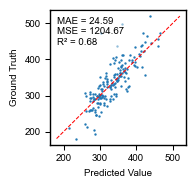

In [ ]:
# 训练并优化XGBoost模型
Tm_xgb_model_fp = XGBoost_model_optuna(
    train_list=Tm_loaded_train_data_list,
    val_list=Tm_loaded_val_data_list,
    scale=1, feature = "fp")

evaluate_model(Tm_xgb_model_fp, Tm_loaded_test_data_list, scale=1, figname="Tm_xgboost_model_evaluation",
                   figsize=(1.75, 1.75), output=True, feature = "fp")

save_model_with_joblib(Tm_xgb_model_fp, '../model/Tm_xgb_model.joblib')

# 训练离子液体电化学窗口ECW数据

[I 2025-03-12 10:32:24,040] A new study created in memory with name: no-name-f705946e-011e-43b1-bfbf-9cf615db74f2
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-12 10:32:31,239] Trial 0 finished with value: 0.6339553594589233 and parameters: {'max_depth': 10, 'learning_rate': 0.012511975734796333, 'n_estimators': 1000, 'min_child_weight': 4, 'gamma': 3.0874434968364812, 'subsample': 0.8684836176114645, 'colsample_bytree': 0.67099235830292, 'reg_alpha': 3.302182025968943e-05, 'reg_lambda': 0.014687802395022263}. Best is trial 0 with value: 0.6339553594589233.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-12 10:32:35,388] Trial 1 finished with value: 0.6405364274978638 and parameters: {'max_depth': 8, 'learning_rate': 0.0283772125232

最终验证集均方误差 (MSE): 0.4974
MSE (Mean Squared Error): 0.67
MAE (Mean Absolute Error): 0.43
RMSE (Root Mean Squared Error): 0.82
R^2 Score: 0.77


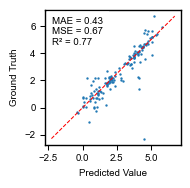

In [14]:
# 训练并优化XGBoost模型
IL_ECW_xgb_model_fp = XGBoost_model_optuna(
    train_list=IL_ECW_loaded_train_data_list,
    val_list=IL_ECW_loaded_val_data_list,
    target_index=0, feature = "fp")

evaluate_model(IL_ECW_xgb_model_fp, IL_ECW_loaded_test_data_list, target_index=0, figname="IL_ECW_xgboost_model_evaluation",
                   figsize=(1.75, 1.75), output=True, feature = "fp")

save_model_with_joblib(IL_ECW_xgb_model_fp, '../model/IL_ECW_xgb_model.joblib')

In [18]:
# 训练并优化XGBoost模型
conductivity_xgb_model_fp = XGBoost_model_optuna(
    train_list=conductivity_loaded_train_data_list,
    val_list=conductivity_loaded_val_data_list,
    scale=10, feature = "fp")

evaluate_model(conductivity_xgb_model_fp, conductivity_loaded_test_data_list, scale=10, figname="conductivity_xgboost_model_evaluation",
                   figsize=(2.3, 2.3), output=False, feature = "fp")

save_model_with_joblib(conductivity_xgb_model_fp, 'conductivity_xgb_model.joblib')

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float32')) -> None

[I 2025-03-11 18:57:43,545] A new study created in memory with name: no-name-e2a88d80-d585-43c8-9ab1-07efee815480
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 18:57:44,471] Trial 0 finished with value: 0.048051804304122925 and parameters: {'max_depth': 9, 'learning_rate': 0.034278288485029215, 'n_estimators': 450, 'min_child_weight': 8, 'gamma': 1.9867997848117387, 'subsample': 0.8437417620120952, 'colsample_bytree': 0.7803314753053308, 'reg_alpha': 0.03515142857276476, 'reg_lambda': 9.417896716573557}. Best is trial 0 with value: 0.048051804304122925.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 18:57:48,199] Trial 1 finished with value: 0.06758567690849304 and parameters: {'max_depth': 6, 'learning_rate': 0.0108923474927

最佳参数:  {'max_depth': 5, 'learning_rate': 0.15640349397429573, 'n_estimators': 350, 'min_child_weight': 1, 'gamma': 0.11899889957093435, 'subsample': 0.8924362435223266, 'colsample_bytree': 0.8155390295074417, 'reg_alpha': 0.0012590705396810222, 'reg_lambda': 4.7930463714560276e-06}
训练时间: 49.11 秒
最终验证集均方误差 (MSE): 0.0210
MSE (Mean Squared Error): 0.06
MAE (Mean Absolute Error): 0.15
RMSE (Root Mean Squared Error): 0.25
R^2 Score: 0.26


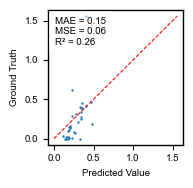

[I 2025-03-11 18:58:32,846] A new study created in memory with name: no-name-9e76a93c-5be1-4914-8923-8eb183d59e75


Seed 42: R2 = 0.2554, MAE = 0.1471, MSE = 0.0616


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 18:58:33,567] Trial 0 finished with value: 0.03675580769777298 and parameters: {'max_depth': 4, 'learning_rate': 0.05820948782333394, 'n_estimators': 100, 'min_child_weight': 7, 'gamma': 0.8903513257627871, 'subsample': 0.8125756373876779, 'colsample_bytree': 0.6683505310965243, 'reg_alpha': 1.0304820679476714e-08, 'reg_lambda': 1.4953218657791804e-07}. Best is trial 0 with value: 0.03675580769777298.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 18:58:35,278] Trial 1 finished with value: 0.0394369401037693 and parameters: {'max_depth': 10, 'learning_rate': 0.024398909592721785, 'n_estimators': 500, 'min_child_weight': 9, 'gamma': 2.1134605756411045, 'subsample': 0.61715031926828

最佳参数:  {'max_depth': 5, 'learning_rate': 0.1820183636440846, 'n_estimators': 200, 'min_child_weight': 1, 'gamma': 0.3145534029824636, 'subsample': 0.9295941312246966, 'colsample_bytree': 0.907937829223295, 'reg_alpha': 1.9783512232039737e-05, 'reg_lambda': 0.00018187739376013877}
训练时间: 76.69 秒
最终验证集均方误差 (MSE): 0.0259
MSE (Mean Squared Error): 0.04
MAE (Mean Absolute Error): 0.15
RMSE (Root Mean Squared Error): 0.21
R^2 Score: 0.46


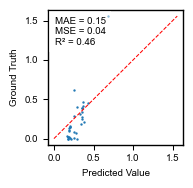

[I 2025-03-11 18:59:49,622] A new study created in memory with name: no-name-5fcdef87-bfd4-414e-b7dc-eeefbd625731


Seed 43: R2 = 0.4599, MAE = 0.1451, MSE = 0.0447


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 18:59:49,973] Trial 0 finished with value: 0.05053243786096573 and parameters: {'max_depth': 5, 'learning_rate': 0.17482209833192072, 'n_estimators': 250, 'min_child_weight': 9, 'gamma': 2.8660432544118555, 'subsample': 0.9412033145109847, 'colsample_bytree': 0.9062652661055106, 'reg_alpha': 0.12532779344134345, 'reg_lambda': 2.4652471955000945}. Best is trial 0 with value: 0.05053243786096573.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 18:59:50,494] Trial 1 finished with value: 0.032136790454387665 and parameters: {'max_depth': 8, 'learning_rate': 0.0658125708434428, 'n_estimators': 850, 'min_child_weight': 7, 'gamma': 0.2325915849479382, 'subsample': 0.9471354233797029, 'col

最佳参数:  {'max_depth': 6, 'learning_rate': 0.07010755699417419, 'n_estimators': 1000, 'min_child_weight': 6, 'gamma': 0.06174497842033871, 'subsample': 0.9518986221792636, 'colsample_bytree': 0.7187545392225995, 'reg_alpha': 3.332464158774068, 'reg_lambda': 0.01168987565619599}
训练时间: 88.16 秒
最终验证集均方误差 (MSE): 0.0274
MSE (Mean Squared Error): 0.04
MAE (Mean Absolute Error): 0.14
RMSE (Root Mean Squared Error): 0.21
R^2 Score: 0.46


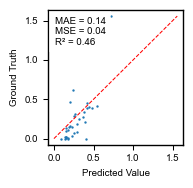

[I 2025-03-11 19:01:18,198] A new study created in memory with name: no-name-6dd82a7d-f5ef-408a-bfbd-cf3473887a14


Seed 44: R2 = 0.4625, MAE = 0.1445, MSE = 0.0445


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:01:19,347] Trial 0 finished with value: 0.066834956407547 and parameters: {'max_depth': 6, 'learning_rate': 0.013148849477660872, 'n_estimators': 600, 'min_child_weight': 7, 'gamma': 2.179746844334447, 'subsample': 0.9973111214535131, 'colsample_bytree': 0.8628055576309619, 'reg_alpha': 2.7047078556046946, 'reg_lambda': 1.614775012617888e-06}. Best is trial 0 with value: 0.066834956407547.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:01:19,633] Trial 1 finished with value: 0.07840564846992493 and parameters: {'max_depth': 4, 'learning_rate': 0.04340548955828059, 'n_estimators': 950, 'min_child_weight': 10, 'gamma': 3.4650009069574788, 'subsample': 0.6788194024089511, 'cols

最佳参数:  {'max_depth': 6, 'learning_rate': 0.14941225348389933, 'n_estimators': 400, 'min_child_weight': 1, 'gamma': 0.12228044043838998, 'subsample': 0.8929924353079569, 'colsample_bytree': 0.665203759389264, 'reg_alpha': 3.1134332830489214e-07, 'reg_lambda': 1.662888892125548e-08}
训练时间: 55.88 秒
最终验证集均方误差 (MSE): 0.0202
MSE (Mean Squared Error): 0.06
MAE (Mean Absolute Error): 0.14
RMSE (Root Mean Squared Error): 0.25
R^2 Score: 0.25


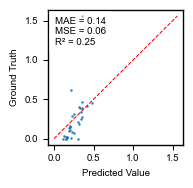

[I 2025-03-11 19:02:14,157] A new study created in memory with name: no-name-1bd30c4f-4443-455d-b983-1028499dc19b


Seed 45: R2 = 0.2496, MAE = 0.1441, MSE = 0.0621


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:02:14,669] Trial 0 finished with value: 0.05804026871919632 and parameters: {'max_depth': 8, 'learning_rate': 0.028436125071253815, 'n_estimators': 200, 'min_child_weight': 6, 'gamma': 4.228434875153956, 'subsample': 0.950512928756752, 'colsample_bytree': 0.8691561716683129, 'reg_alpha': 3.433027661558027e-08, 'reg_lambda': 3.881763081463718e-05}. Best is trial 0 with value: 0.05804026871919632.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:02:15,931] Trial 1 finished with value: 0.042621150612831116 and parameters: {'max_depth': 5, 'learning_rate': 0.020149439569796333, 'n_estimators': 550, 'min_child_weight': 9, 'gamma': 2.244927775052181, 'subsample': 0.9440357203956716,

最佳参数:  {'max_depth': 6, 'learning_rate': 0.16617400682423247, 'n_estimators': 300, 'min_child_weight': 6, 'gamma': 0.007271491497844673, 'subsample': 0.8044695461538832, 'colsample_bytree': 0.6953950347708776, 'reg_alpha': 0.012821604146131583, 'reg_lambda': 0.0003179295737379829}
训练时间: 81.08 秒
最终验证集均方误差 (MSE): 0.0249
MSE (Mean Squared Error): 0.04
MAE (Mean Absolute Error): 0.15
RMSE (Root Mean Squared Error): 0.21
R^2 Score: 0.47


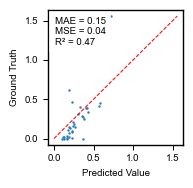

[I 2025-03-11 19:03:35,386] A new study created in memory with name: no-name-c0950d73-51c5-4957-9ee1-de2edd236509


Seed 46: R2 = 0.4695, MAE = 0.1457, MSE = 0.0439


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:03:36,778] Trial 0 finished with value: 0.048035625368356705 and parameters: {'max_depth': 10, 'learning_rate': 0.1129280344734031, 'n_estimators': 100, 'min_child_weight': 1, 'gamma': 4.1183261017129045, 'subsample': 0.78752019091276, 'colsample_bytree': 0.7841866617827875, 'reg_alpha': 0.020341487380387886, 'reg_lambda': 2.7385394083315625e-06}. Best is trial 0 with value: 0.048035625368356705.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:03:37,338] Trial 1 finished with value: 0.040406741201877594 and parameters: {'max_depth': 10, 'learning_rate': 0.1806878019709494, 'n_estimators': 350, 'min_child_weight': 8, 'gamma': 0.1819521639894417, 'subsample': 0.6131778735811709

最佳参数:  {'max_depth': 9, 'learning_rate': 0.1661293775958454, 'n_estimators': 600, 'min_child_weight': 7, 'gamma': 0.0057860861724264995, 'subsample': 0.9371372772005027, 'colsample_bytree': 0.6443652421180291, 'reg_alpha': 0.030439397166136032, 'reg_lambda': 0.0490665650882236}
训练时间: 66.18 秒
最终验证集均方误差 (MSE): 0.0273
MSE (Mean Squared Error): 0.06
MAE (Mean Absolute Error): 0.17
RMSE (Root Mean Squared Error): 0.24
R^2 Score: 0.30


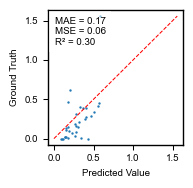

[I 2025-03-11 19:04:41,637] A new study created in memory with name: no-name-8ddd468a-f50c-4f89-a757-8288182b617e


Seed 47: R2 = 0.2966, MAE = 0.1680, MSE = 0.0582


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:04:41,973] Trial 0 finished with value: 0.034916672855615616 and parameters: {'max_depth': 3, 'learning_rate': 0.13226561474250634, 'n_estimators': 700, 'min_child_weight': 5, 'gamma': 0.4144868786086786, 'subsample': 0.8640746894488098, 'colsample_bytree': 0.7663708326235511, 'reg_alpha': 0.0006509057494713027, 'reg_lambda': 1.198872813467445e-07}. Best is trial 0 with value: 0.034916672855615616.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:04:44,188] Trial 1 finished with value: 0.06864525377750397 and parameters: {'max_depth': 8, 'learning_rate': 0.039050940976435716, 'n_estimators': 400, 'min_child_weight': 9, 'gamma': 4.88707808518417, 'subsample': 0.7073897152774296

最佳参数:  {'max_depth': 5, 'learning_rate': 0.1347404434710366, 'n_estimators': 750, 'min_child_weight': 1, 'gamma': 0.1145872124595988, 'subsample': 0.8445562697285363, 'colsample_bytree': 0.8084708580528007, 'reg_alpha': 1.5988983359627991e-06, 'reg_lambda': 2.214298521378784e-07}
训练时间: 61.74 秒
最终验证集均方误差 (MSE): 0.0233
MSE (Mean Squared Error): 0.06
MAE (Mean Absolute Error): 0.16
RMSE (Root Mean Squared Error): 0.25
R^2 Score: 0.24


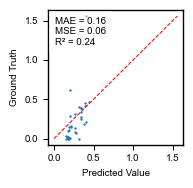

[I 2025-03-11 19:05:43,442] A new study created in memory with name: no-name-3f75aae2-5060-413b-9f5a-563d2a8973c5


Seed 48: R2 = 0.2405, MAE = 0.1552, MSE = 0.0629


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:05:44,180] Trial 0 finished with value: 0.03958619758486748 and parameters: {'max_depth': 3, 'learning_rate': 0.013425522672801693, 'n_estimators': 100, 'min_child_weight': 5, 'gamma': 0.49123545815380976, 'subsample': 0.6989307326650404, 'colsample_bytree': 0.7202908497770244, 'reg_alpha': 0.012808614318512069, 'reg_lambda': 0.4018012608750177}. Best is trial 0 with value: 0.03958619758486748.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:05:44,470] Trial 1 finished with value: 0.04793594032526016 and parameters: {'max_depth': 3, 'learning_rate': 0.16037236325401433, 'n_estimators': 800, 'min_child_weight': 8, 'gamma': 4.4223860253586995, 'subsample': 0.6816904599279608, '

最佳参数:  {'max_depth': 8, 'learning_rate': 0.19260424536871712, 'n_estimators': 550, 'min_child_weight': 1, 'gamma': 0.13211421932795844, 'subsample': 0.8858983378470872, 'colsample_bytree': 0.6177527771302695, 'reg_alpha': 0.0008737223655715992, 'reg_lambda': 3.5271401935121363}
训练时间: 55.76 秒
最终验证集均方误差 (MSE): 0.0199
MSE (Mean Squared Error): 0.05
MAE (Mean Absolute Error): 0.13
RMSE (Root Mean Squared Error): 0.21
R^2 Score: 0.45


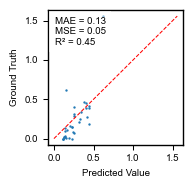

[I 2025-03-11 19:06:39,267] A new study created in memory with name: no-name-2826d885-6799-4bab-b527-c28a86d8e289


Seed 49: R2 = 0.4515, MAE = 0.1335, MSE = 0.0454


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:06:40,213] Trial 0 finished with value: 0.037629738450050354 and parameters: {'max_depth': 5, 'learning_rate': 0.07685006868875116, 'n_estimators': 100, 'min_child_weight': 7, 'gamma': 2.5301302781961437, 'subsample': 0.667322144381719, 'colsample_bytree': 0.7289237662095234, 'reg_alpha': 0.01624694058927664, 'reg_lambda': 4.515641331038711e-08}. Best is trial 0 with value: 0.037629738450050354.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:06:43,258] Trial 1 finished with value: 0.05316264554858208 and parameters: {'max_depth': 9, 'learning_rate': 0.010116354220144218, 'n_estimators': 600, 'min_child_weight': 1, 'gamma': 4.02269042187779, 'subsample': 0.6597048993433923, '

最佳参数:  {'max_depth': 9, 'learning_rate': 0.18274717824255712, 'n_estimators': 950, 'min_child_weight': 10, 'gamma': 0.8587735233847744, 'subsample': 0.9527552345690955, 'colsample_bytree': 0.864203182230468, 'reg_alpha': 0.000426865175046783, 'reg_lambda': 0.02004551813257754}
训练时间: 66.45 秒
最终验证集均方误差 (MSE): 0.0275
MSE (Mean Squared Error): 0.05
MAE (Mean Absolute Error): 0.15
RMSE (Root Mean Squared Error): 0.22
R^2 Score: 0.39


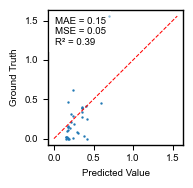

[I 2025-03-11 19:07:45,810] A new study created in memory with name: no-name-36976ccc-e5e5-4412-b552-973a2697b2b2


Seed 50: R2 = 0.3904, MAE = 0.1524, MSE = 0.0505


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:07:46,913] Trial 0 finished with value: 0.056246932595968246 and parameters: {'max_depth': 3, 'learning_rate': 0.12028497445634688, 'n_estimators': 900, 'min_child_weight': 7, 'gamma': 4.1374223349296715, 'subsample': 0.639246866962514, 'colsample_bytree': 0.6346003243117385, 'reg_alpha': 1.3270645499782046, 'reg_lambda': 3.467631993347111e-08}. Best is trial 0 with value: 0.056246932595968246.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-11 19:07:47,352] Trial 1 finished with value: 0.040128692984580994 and parameters: {'max_depth': 7, 'learning_rate': 0.08022611388724528, 'n_estimators': 1000, 'min_child_weight': 6, 'gamma': 1.6692878697709812, 'subsample': 0.7210000093026641,

最佳参数:  {'max_depth': 10, 'learning_rate': 0.18699595358129154, 'n_estimators': 550, 'min_child_weight': 3, 'gamma': 0.12684462150223696, 'subsample': 0.9801134202504433, 'colsample_bytree': 0.9015086508756978, 'reg_alpha': 6.94891705684638e-07, 'reg_lambda': 0.0001086751221005194}
训练时间: 60.31 秒
最终验证集均方误差 (MSE): 0.0236
MSE (Mean Squared Error): 0.05
MAE (Mean Absolute Error): 0.14
RMSE (Root Mean Squared Error): 0.23
R^2 Score: 0.36


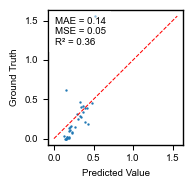

Seed 51: R2 = 0.3642, MAE = 0.1419, MSE = 0.0526


'\nset_seed(42)  # 42 是种子值，可替换为其他数值\n\n# 训练并优化XGBoost模型\nconductivity_xgb_model_fp = XGBoost_model_optuna(\n    train_list=conductivity_loaded_train_data_list,\n    val_list=conductivity_loaded_val_data_list,\n    target_index=0, feature = "fp")\n\nmae, mse, r2 = evaluate_model(conductivity_xgb_model_fp, conductivity_loaded_test_data_list, target_index=0, figname="model_evaluation",\n                   figsize=(1.75, 1.75), output=False, feature = "fp")\n\n'

In [11]:
'''
请你给出一个函数，函数的输入值为seed，N，train_list，val_list，test_list，target_index，feature，
输出值为训练好的XGBoost模型以及对应的随机种子（以字典形式返回），函数的功能是：改变N次随机种子，训练N个XGBoost模型，并且以列表形式存储这N个模型，
打印这N个模型在测试集上的性能（R2，MAE，MSE），模型名称对应的随机种子。
'''

conductivity_models_dict = train_multiple_xgboost_models(seed=42, N=10, 
                                                         train_list=conductivity_loaded_train_data_list, 
                                                         val_list=conductivity_loaded_val_data_list, 
                                                         test_list=conductivity_loaded_test_data_list, 
                                                         target_index=0, 
                                                         feature="fp")
'''
set_seed(42)  # 42 是种子值，可替换为其他数值

# 训练并优化XGBoost模型
conductivity_xgb_model_fp = XGBoost_model_optuna(
    train_list=conductivity_loaded_train_data_list,
    val_list=conductivity_loaded_val_data_list,
    target_index=0, feature = "fp")

mae, mse, r2 = evaluate_model(conductivity_xgb_model_fp, conductivity_loaded_test_data_list, target_index=0, figname="model_evaluation",
                   figsize=(1.75, 1.75), output=False, feature = "fp")

'''
# save_model_with_joblib(conductivity_xgb_model_fp, '../model/conductivity_xgb_model.joblib')

MSE (Mean Squared Error): 0.05
MAE (Mean Absolute Error): 0.15
RMSE (Root Mean Squared Error): 0.22
R^2 Score: 0.41


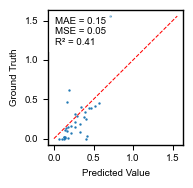

In [16]:
evaluate_model(conductivity_xgb_model_fp, conductivity_loaded_test_data_list, target_index=0, figname="model_evaluation",
                   figsize=(1.75, 1.75), output=False, feature = "fp")

[I 2025-03-07 17:25:55,864] A new study created in memory with name: no-name-a34770d7-1c52-4829-aef1-76975ec87c8b
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-07 17:25:57,755] Trial 0 finished with value: 2.815340280532837 and parameters: {'max_depth': 9, 'learning_rate': 0.020922631368045338, 'n_estimators': 650, 'min_child_weight': 2, 'gamma': 4.518430752836802, 'subsample': 0.9584142463227951, 'colsample_bytree': 0.6766738646172944, 'reg_alpha': 0.014398316651800611, 'reg_lambda': 0.0072434030939343115}. Best is trial 0 with value: 2.815340280532837.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-07 17:25:58,690] Trial 1 finished with value: 2.7307910919189453 and parameters: {'max_depth': 7, 'learning_rate': 0.0656573358757548

最佳参数:  {'max_depth': 9, 'learning_rate': 0.17753083025738453, 'n_estimators': 350, 'min_child_weight': 3, 'gamma': 0.6685905338080185, 'subsample': 0.6185447601682714, 'colsample_bytree': 0.7033670808660495, 'reg_alpha': 1.6906132377185148, 'reg_lambda': 2.0615940890578631e-07}
训练时间: 154.02 秒
最终验证集均方误差 (MSE): 2.4407
MSE (Mean Squared Error): 0.86
MAE (Mean Absolute Error): 0.80
RMSE (Root Mean Squared Error): 0.93
R^2 Score: 0.13


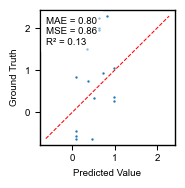

In [27]:
# 训练并优化XGBoost模型
anion_ox_xgb_model_fp = XGBoost_model_optuna(
    train_list=anion_ox_loaded_train_data_list,
    val_list=anion_ox_loaded_val_data_list,
    target_index=0, feature = "fp")

evaluate_model(anion_ox_xgb_model_fp, anion_ox_loaded_test_data_list, target_index=0, figname="model_evaluation",
                   figsize=(1.75, 1.75), output=False, feature = "fp")


[I 2025-03-07 16:50:34,508] A new study created in memory with name: no-name-31fab7a1-056e-41d8-8db7-69fb3387f2e2
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-07 16:50:40,490] Trial 0 finished with value: 1.1991113424301147 and parameters: {'max_depth': 9, 'learning_rate': 0.02830815459042285, 'n_estimators': 450, 'min_child_weight': 2, 'gamma': 0.960212849475558, 'subsample': 0.8875000974269379, 'colsample_bytree': 0.8153247303711239, 'reg_alpha': 6.812339935398984e-07, 'reg_lambda': 0.3149409203552244}. Best is trial 0 with value: 1.1991113424301147.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2025-03-07 16:50:50,335] Trial 1 finished with value: 1.2496496438980103 and parameters: {'max_depth': 9, 'learning_rate': 0.01165990537479034

最佳参数:  {'max_depth': 10, 'learning_rate': 0.14886413419726652, 'n_estimators': 600, 'min_child_weight': 6, 'gamma': 0.46517025899151265, 'subsample': 0.61082389913218, 'colsample_bytree': 0.9968128598818274, 'reg_alpha': 4.533371951626385e-05, 'reg_lambda': 0.5433040052532987}
训练时间: 464.04 秒
最终验证集均方误差 (MSE): 1.0311
MSE (Mean Squared Error): 0.51
MAE (Mean Absolute Error): 0.48
RMSE (Root Mean Squared Error): 0.71
R^2 Score: 0.42


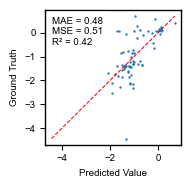

In [25]:
# 训练并优化XGBoost模型
cation_red_xgb_model_fp = XGBoost_model_optuna(
    train_list=cation_red_loaded_train_data_list,
    val_list=cation_red_loaded_val_data_list,
    target_index=0, feature = "fp")

evaluate_model(cation_red_xgb_model_fp, cation_red_loaded_test_data_list, target_index=0, figname="model_evaluation",
                   figsize=(1.75, 1.75), output=False, feature = "fp")

In [ ]:
save_model_with_joblib(Tm_xgb_model_fp, '../model/Tm_xgb_model.joblib')
save_model_with_joblib(conductivity_xgb_model_fp, '../model/conductivity_xgb_model.joblib')